In [21]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from os import listdir, getcwd, chdir
from os.path import isfile, join
import os

from diff_predictor.utils import process_labels#, process_multimodel_data, extract_string_from_df

In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/Nance Lab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/Nance Lab/diff_predictor


In [22]:
def process_multimodel_data(filelist, data_path):  
    mean_acc = []
    min_acc = []
    max_acc = []
    var_acc = []
    stdev_acc = []

    mean_traj_count = []
    min_traj_count = []
    max_traj_count = []
    var_traj_count = []
    stdev_traj_count = []

    # mean_frames = []
    # mean_dist_tot = []
    # mean_dist_net = []
    # jacc_list = []

    for file in filelist:
        df = pd.read_csv(data_path + file)
        mean_acc.append(df['Accuracies'].mean())
        min_acc.append(df['Accuracies'].min())
        max_acc.append(df['Accuracies'].max())
        var_acc.append(df['Accuracies'].var())
        stdev_acc.append(df['Accuracies'].std())

        mean_traj_count.append(df['Trajectory Count'].mean())
        min_traj_count.append(df['Trajectory Count'].min())
        max_traj_count.append(df['Trajectory Count'].max())
        var_traj_count.append(df['Trajectory Count'].var())
        stdev_traj_count.append(df['Trajectory Count'].std())

        # raw_frames = extract_string_from_df(df, 'Frames')
        # mean_frames.append(np.array(raw_frames).mean())

        # raw_dist_tot = process_dist_cols(df, 'dist_tot', nan_strat=None)
        # mean_dist_tot.append(np.array(raw_dist_tot).mean())
        # raw_dist_net = process_dist_cols(df, 'dist_net', nan_strat=None)
        # mean_dist_net.append(np.array(raw_dist_net).mean())

       # true_labels = process_labels(df, 'True Labels')
       # preds = process_labels(df, 'Preds')
        #jacc_score = jaccard_score(true_labels, preds, average=None)
        #jacc_list.append(jacc_score)
           
        result = {'mean_acc': mean_acc, 
              'min_acc': min_acc, 
              'max_acc': max_acc, 
              'var_acc': var_acc, 
              'stdev_acc': stdev_acc, 
              'mean_traj_count': mean_traj_count, 
              'min_traj_count': min_traj_count,
              'max_traj_count': max_traj_count,
              'var_traj_count': var_traj_count,
              'stdev_traj_count': stdev_traj_count,
              # 'mean_frames': mean_frames,
              # 'mean_dist_tot': mean_dist_tot,
              # 'mean_dist_net': mean_dist_net,
              # 'jacc_scores': jacc_score
            #   'min_frames': min_frames,
            #   'max_frames': max_frames,
            #   'var_frames': var_frames,
            #   'stdev_frames': stdev_frames
              }
    return result

# Dataset #1: Age data, P14, P35, and P70

In [23]:
dataset_path_age = workbookDir + '/data/age_traj_count_outputs/'
age_data_filelist = ['one_files_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv',
            'seven_file_run_data.csv',
            'eight_file_run_data.csv',
            'nine_file_run_data.csv',
            'ten_file_run_data.csv',
            'eleven_file_run_data.csv',
            'twelve_file_run_data.csv',
            'thirteen_files_run_data.csv',
            'fourteen_files_run_data.csv',
            'fifteen_files_run_data.csv',
]

In [24]:
age_data_dict = process_multimodel_data(age_data_filelist, dataset_path_age)

Text(0.5, 1.0, 'Mean accuracy across 100 models')

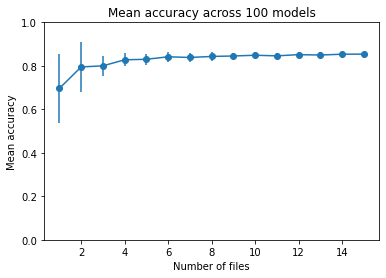

In [25]:
fig, ax = plt.subplots()
#ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
ax.errorbar(np.arange(1,16), age_data_dict['mean_acc'], yerr=age_data_dict['stdev_acc'], fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of files')
plt.title('Mean accuracy across 100 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['mean_acc'], c='m', label='Mean')
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['min_acc'], c='g', label='Min')
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['max_acc'], c='b', label='Max')

plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_data_dict['mean_acc'])):
    plt.scatter(age_data_dict['stdev_acc'][i], age_data_dict['mean_acc'][i], label=age_data_dict['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Variance for random file subsets')

# Dataset 2: region data (all regions)

In [3]:
dataset_path_region = workbookDir + '/data/region_traj_count_outputs/'
region_filelist = ['one_file_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv']

In [4]:
region_data_dict = process_multimodel_data(region_filelist, dataset_path_region)

KeyError: 'Frames'

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(region_data_dict['mean_traj_count'], region_data_dict['mean_acc'], yerr=region_data_dict['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 100 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=region_data_dict['mean_traj_count'], y=region_data_dict['mean_acc'], c='m', label='Mean')
plt.scatter(region_data_dict['mean_traj_count'], region_data_dict['max_acc'], c='g', label='Max')
plt.scatter(region_data_dict['mean_traj_count'], region_data_dict['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_data_dict['mean_acc'])):
    plt.scatter(region_data_dict['stdev_acc'][i], region_data_dict['mean_acc'][i], label=region_data_dict['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #3: Using average of 500 models instead of 100 on region data

In [26]:
region_500model_filelist = ['region500model_1file_run_data.csv', 
                            'region500model_2file_run_data.csv',
                            'region500model_3file_run_data.csv',
                            'region500model_4file_run_data.csv',
                            'region500model_5file_run_data.csv',
                            'region500model_6file_run_data.csv'
                            ]

In [27]:
path_to_data = '/Users/nelsschimek/Documents/Nance Lab/diff_predictor/data/region_500models_traj_count_outputs/'
result = process_multimodel_data(region_500model_filelist, path_to_data)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

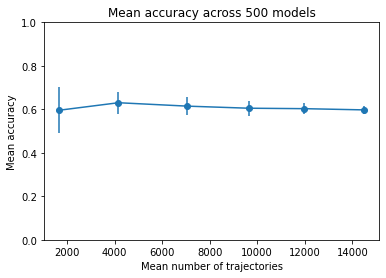

In [28]:
fig, ax = plt.subplots()
ax.errorbar(result['mean_traj_count'], result['mean_acc'], yerr=result['stdev_acc'], fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

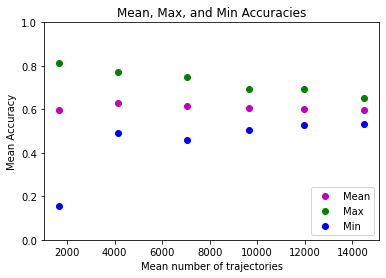

In [29]:
fig, ax = plt.subplots()
plt.scatter(x=result['mean_traj_count'], y=result['mean_acc'], c='m', label='Mean')
plt.scatter(result['mean_traj_count'], result['max_acc'], c='g', label='Max')
plt.scatter(result['mean_traj_count'], result['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

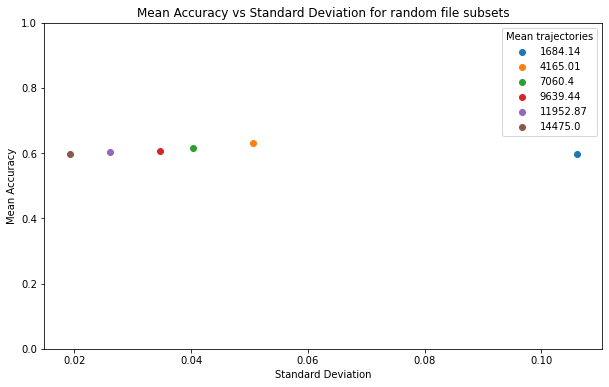

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(result['mean_acc'])):
    plt.scatter(result['stdev_acc'][i], result['mean_acc'][i], label=result['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #4: age data averaged over 500 models

In [31]:
age_500model_dataset_path = workbookDir + '/data/age_500models_traj_count_outputs/'
age_500model_filelist = ['age_500model_1file_run_data.csv',
                            'age_500model_2file_run_data.csv',
                            'age_500model_3file_run_data.csv',
                            'age_500model_4file_run_data.csv',
                            'age_500model_5file_run_data.csv',
                            'age_500model_6files_run_data.csv',
                            'age_500model_7files_run_data.csv',
                            'age_500model_8files_run_data.csv',
                            'age_500model_9files_run_data.csv',
                            'age_500model_10files_run_data.csv',
                            'age_500model_11files_run_data.csv',
                            'age_500model_12file_run_data.csv',
                            'age_500model_13file_run_data.csv',
                            'age_500model_14file_run_data.csv',
                            'age_500model_15file_run_data.csv',
                            ]

In [32]:
age_500model_dc = process_multimodel_data(age_500model_filelist, age_500model_dataset_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

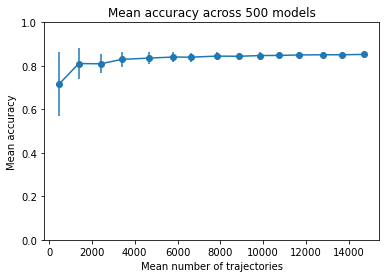

In [33]:
fig, ax = plt.subplots()
ax.errorbar(age_500model_dc['mean_traj_count'], age_500model_dc['mean_acc'], yerr=age_500model_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

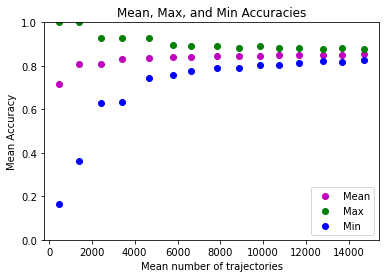

In [36]:
fig, ax = plt.subplots()
plt.scatter(x=age_500model_dc['mean_traj_count'], y=age_500model_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_500model_dc['mean_traj_count'], age_500model_dc['max_acc'], c='g', label='Max')
plt.scatter(age_500model_dc['mean_traj_count'], age_500model_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

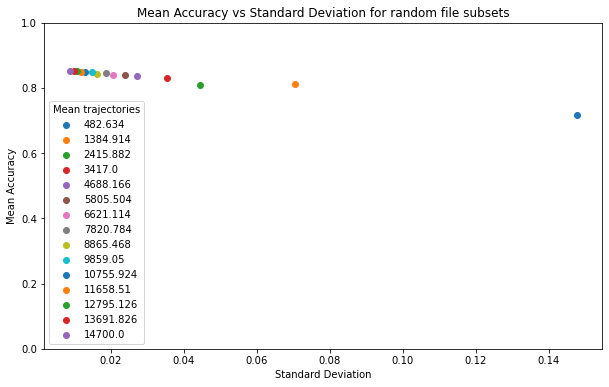

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_500model_dc['mean_acc'])):
    plt.scatter(age_500model_dc['stdev_acc'][i], age_500model_dc['mean_acc'][i], label=age_500model_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #5: 500 models on best 3 classes of region data
## Hippocampus, cortex, striatum

In [37]:
region_hcs_path = workbookDir + '/data/region_hippo_cort_striat_traj_count_outputs/'
region_hip_cort_striat_filelist = ['region_hippo_cort_striat_500model_one_files.csv',
                                   'region_hippo_cort_striat_500model_two_files.csv',
                                   'region_hippo_cort_striat_500model_three_files.csv',
                                   'region_hippo_cort_striat_500model_four_files.csv',
                                   'region_hippo_cort_striat_500model_five_files.csv',
                                   'region_hippo_cort_striat_500model_six_files.csv'
                                   ]

In [38]:
regions_hcs_dc = process_multimodel_data(region_hip_cort_striat_filelist, region_hcs_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

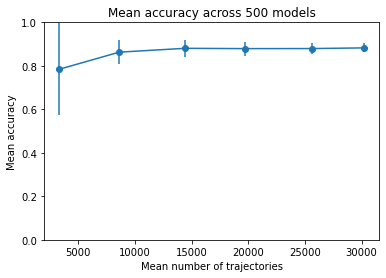

In [39]:
fig, ax = plt.subplots()
ax.errorbar(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['mean_acc'], yerr=regions_hcs_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

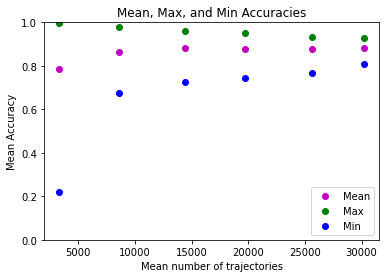

In [40]:
fig, ax = plt.subplots()
plt.scatter(x=regions_hcs_dc['mean_traj_count'], y=regions_hcs_dc['mean_acc'], c='m', label='Mean')
plt.scatter(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['max_acc'], c='g', label='Max')
plt.scatter(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

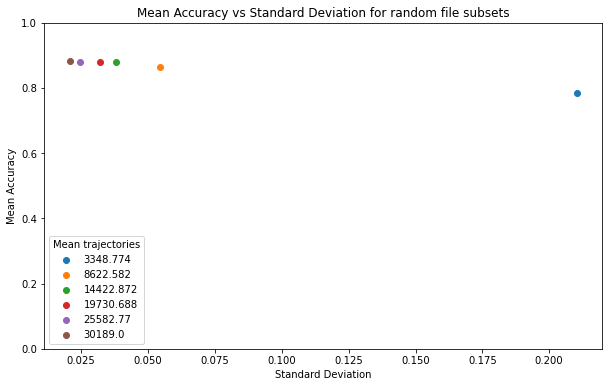

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(regions_hcs_dc['mean_acc'])):
    plt.scatter(regions_hcs_dc['stdev_acc'][i], regions_hcs_dc['mean_acc'][i], label=regions_hcs_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #6: top two regions
## useful because we can now go up to 10 files

In [42]:
region_cs_path = workbookDir + '/data/region_cort_striat_traj_count_outputs/'
region_cort_striat_filelist = ['region_cort_striat_500model_one_file.csv',
                                   'region_cort_striat_500model_two_files.csv',
                                   'region_cort_striat_500model_three_files.csv',
                                   'region_cort_striat_500model_four_files.csv',
                                   'region_cort_striat_500model_five_files.csv',
                                   'region_cort_striat_500model_six_files.csv',
                                   'region_cort_striat_500model_seven_files.csv',
                                   'region_cort_striat_500model_eight_files.csv',
                                   'region_cort_striat_500model_nine_files.csv',
                                   'region_cort_striat_500model_ten_files.csv'
                                   ]

In [43]:
region_cs_dc = process_multimodel_data(region_cort_striat_filelist, region_cs_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

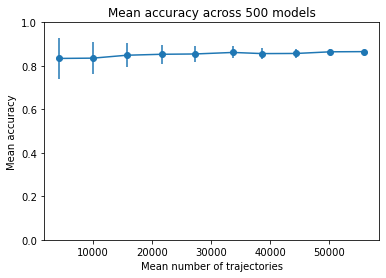

In [44]:
fig, ax = plt.subplots()
ax.errorbar(region_cs_dc['mean_traj_count'], region_cs_dc['mean_acc'], yerr=region_cs_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

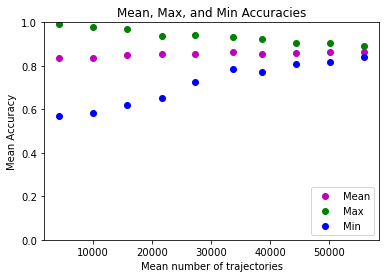

In [45]:
fig, ax = plt.subplots()
plt.scatter(x=region_cs_dc['mean_traj_count'], y=region_cs_dc['mean_acc'], c='m', label='Mean')
plt.scatter(region_cs_dc['mean_traj_count'], region_cs_dc['max_acc'], c='g', label='Max')
plt.scatter(region_cs_dc['mean_traj_count'], region_cs_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_cs_dc['mean_acc'])):
    plt.scatter(region_cs_dc['stdev_acc'][i], region_cs_dc['mean_acc'][i], label=region_cs_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

# Dataset #7: regions hippo, gangl, thala
## all have 6 files

In [46]:
region_hgt_path = workbookDir + '/data/region_hippo_gangl_thala_500model_traj_count_outputs/'
region_hippo_gangl_thala_filelist = ['region_hippo_gangl_thala_500model_one_file.csv',
                                   'region_hippo_gangl_thala_500model_two_files.csv',
                                   'region_hippo_gangl_thala_500model_three_files.csv',
                                   'region_hippo_gangl_thala_500model_four_files.csv',
                                   'region_hippo_gangl_thala_500model_five_files.csv',
                                   'region_hippo_gangl_thala_500model_six_files.csv'
                                   ]

In [47]:
region_hgt_dc = process_multimodel_data(region_hippo_gangl_thala_filelist, region_hgt_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

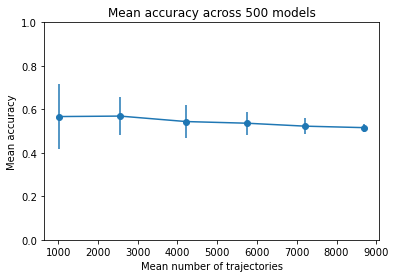

In [48]:
fig, ax = plt.subplots()
ax.errorbar(region_hgt_dc['mean_traj_count'], region_hgt_dc['mean_acc'], yerr=region_hgt_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

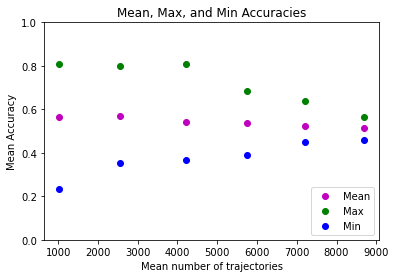

In [49]:
fig, ax = plt.subplots()
plt.scatter(x=region_hgt_dc['mean_traj_count'], y=region_hgt_dc['mean_acc'], c='m', label='Mean')
plt.scatter(region_hgt_dc['mean_traj_count'], region_hgt_dc['max_acc'], c='g', label='Max')
plt.scatter(region_hgt_dc['mean_traj_count'], region_hgt_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard deviation for random file subsets')

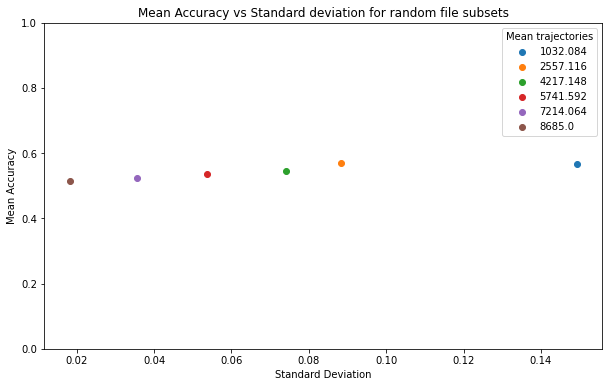

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_hgt_dc['mean_acc'])):
    plt.scatter(region_hgt_dc['stdev_acc'][i], region_hgt_dc['mean_acc'][i], label=region_hgt_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

# Dataset 8: all ages 
## Prior age plots were just p21, p35, p70

In [51]:
age_all_path = workbookDir + '/data/age_all_ages_traj_count_outputs/'
age_all_filelist = ['age_all_one_file_data.csv',
                    'age_all_two_file_data.csv',
                    'age_all_three_file_data.csv',
                    'age_all_four_file_data.csv',
                    'age_all_five_file_data.csv',
                    'age_all_six_file_data.csv',
                    'age_all_seven_file_data.csv',
                    'age_all_eight_file_data.csv',
                    'age_all_nine_file_data.csv',
                    'age_all_ten_file_data.csv',
                    'age_all_eleven_file_data.csv',
                    'age_all_twelve_file_data.csv',
                    'age_all_thirteen_file_data.csv',
                    'age_all_fourteen_file_data.csv',
                    'age_all_fifteen_file_data.csv']


In [ ]:
age_all_dc = process_multimodel_data(age_all_filelist, age_all_path)
age_all_dc

Text(0.5, 1.0, 'Mean accuracy across 500 models')

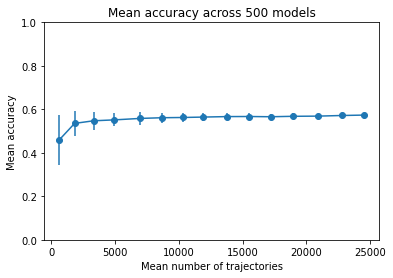

In [53]:
fig, ax = plt.subplots()
ax.errorbar(age_all_dc['mean_traj_count'], age_all_dc['mean_acc'], yerr=age_all_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

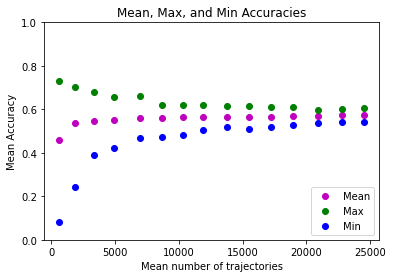

In [54]:
fig, ax = plt.subplots()
plt.scatter(x=age_all_dc['mean_traj_count'], y=age_all_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_all_dc['mean_traj_count'], age_all_dc['max_acc'], c='g', label='Max')
plt.scatter(age_all_dc['mean_traj_count'], age_all_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard deviation for random file subsets')

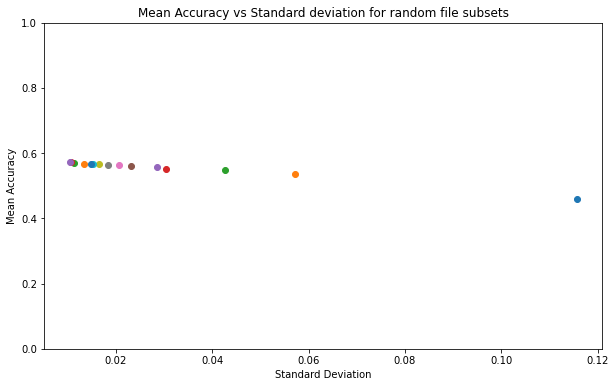

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_all_dc['mean_acc'])):
    plt.scatter(age_all_dc['stdev_acc'][i], age_all_dc['mean_acc'][i], label=age_all_dc['mean_traj_count'][i])
#plt.legend(loc='top', title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

KeyError: 'mean_frames'

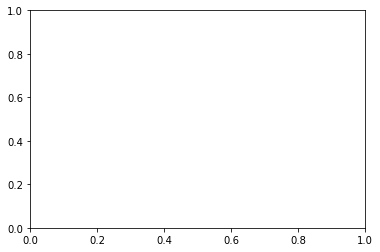

In [56]:
fig, ax = plt.subplots()
ax.errorbar(age_all_dc['mean_frames'], age_all_dc['mean_acc'], yerr=age_all_dc['stdev_acc'], fmt='o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

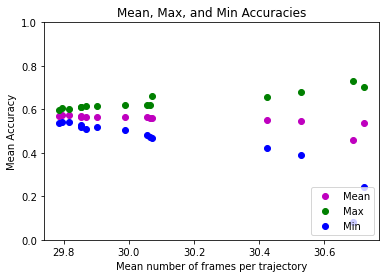

In [38]:
fig, ax = plt.subplots()
plt.scatter(x=age_all_dc['mean_frames'], y=age_all_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_all_dc['mean_frames'], age_all_dc['max_acc'], c='g', label='Max')
plt.scatter(age_all_dc['mean_frames'], age_all_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of frames per trajectory')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean accuracy across 500 models')

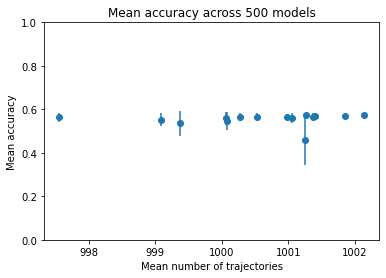

In [8]:
fig, ax = plt.subplots()
ax.errorbar(age_all_dc['mean_dist_net'], age_all_dc['mean_acc'], yerr=age_all_dc['stdev_acc'], fmt='o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

## I want to try and pull out individual classes

In [21]:
testdf = pd.read_csv(age_all_path + age_all_filelist[0])
testdf['True Labels'][0]

'[0. 4. 3. 4. 1. 1. 0. 4. 0. 3. 3. 4. 3. 1. 1. 4. 0. 2. 0. 0. 3. 0. 0. 1.\n 1. 4. 1. 2. 3. 2. 3. 4. 2. 0. 1. 1. 2. 2. 3. 4. 0. 1. 0. 0. 0. 4. 2. 2.\n 0. 3. 0. 2. 1. 1. 0. 0. 4. 1. 3. 3. 4. 2. 2. 2. 2. 3. 1. 4. 2. 4. 1. 3.\n 1. 3. 4. 3. 3. 3. 2. 0. 0. 0. 3. 4. 3. 2. 1. 3. 4. 2. 3. 4. 2. 2. 0. 3.\n 4. 3. 3. 2. 4. 3. 2. 4. 1. 0. 0. 1. 0. 0. 0. 2. 0. 4. 1. 1. 4. 4. 4. 1.\n 1. 0. 4. 2. 1. 3. 0. 0. 4. 4. 4. 1. 1. 4. 4. 2. 2. 0. 1. 4. 2. 1. 2. 0.\n 2. 1. 1. 0. 4. 4. 0. 1. 1. 0. 4. 4. 0. 3. 0. 2. 3. 4. 4. 4. 4. 2. 2. 2.\n 4. 1. 4. 4. 3. 3. 1. 3. 4. 2. 4. 2. 2. 1. 4. 3. 0. 4. 0. 4. 4. 0. 1. 3.\n 1. 1. 0. 4. 2. 1. 1. 1. 1. 1. 2. 1. 1. 0. 4. 1. 2. 0. 1. 4. 4. 4. 4. 1.\n 4. 1. 1. 0. 0. 2. 2. 0. 4. 0. 1. 1. 1. 2. 4. 0. 3. 1. 0. 1. 2. 4. 3. 0.\n 4. 1. 2. 1. 0.]'

In [55]:
testdf = pd.read_csv(age_all_path + age_all_filelist[1])
len(testdf['True Labels'][0])

174

In [64]:
def process_labels(df, true_col='True Labels', pred_col = 'Preds'):
        list_of_preds = []
        list_of_trues = []
        for i in range(0,len(df)):
                #print(i)
                true_string = df[true_col][i][1:(len(df[true_col][i])-1)]
                pred_string = df[pred_col][i][1:(len(df[pred_col][i])-1)]
                true_lines = true_string.splitlines()
                pred_lines = pred_string.splitlines()
                print(true_string)
                print(pred_string)
                break
                # for line in frames_lines:
                #         if col_name == 'True Labels':
                #                 line = line.split('. ')
                #         elif col_name == 'Preds':
                #                 line = line.split(', ')
                #         for val in line:
                #                 print(val)
                #                 if len(val) == 1:
                #                         list_of_ints.append(int(val))
                #                 elif val[0] == ' ':
                #                         val = val[1]
                #                         list_of_ints.append(int(val))
                #                 else:
                #                         val = val[0]
                #                         list_of_ints.append(int(val))
        return list_of_ints

In [65]:
from sklearn.metrics import jaccard_score
true_labels = process_labels(testdf)
# print(len(true_labels))
# preds = process_labels(testdf, 'Preds')
# print(len(preds))
# jaccard_score(true_labels, preds, average=None)

2. 3. 4. 2. 3. 3. 0. 3. 1. 1. 4. 3. 2. 3. 2. 2. 2. 2. 4. 0. 1. 1. 1. 1.
 1. 1. 2. 4. 0. 4. 1. 0. 4. 3. 0. 4. 3. 0. 2. 0. 3. 0. 2. 4. 0. 3. 1. 0.
 3. 3. 3. 3. 4. 0. 0. 4. 3.
3, 3, 2, 0, 3, 2, 3, 3, 1, 1, 4, 3, 2, 0, 0, 0, 1, 0, 4, 3, 4, 1, 1, 1, 1, 1, 2, 0, 2, 4, 1, 2, 0, 2, 0, 4, 2, 0, 2, 1, 3, 0, 2, 4, 3, 2, 2, 0, 1, 1, 3, 1, 4, 0, 0, 4, 0


NameError: name 'list_of_ints' is not defined

In [ ]:
smaller_df = testdf.sample(250)

plt.scatter(smaller_df['Trajectory Count'], smaller_df['Accuracies'], s=0.5)

In [26]:
def extract_string_from_df(df, col_name):
    mean_frames = []



    subset_mean_frames_list = []

    for i in range(0,len(testdf)):
        frames_string = df[col_name][i][1:(len(df[col_name][i])-1)]
        frames_list = frames_string.split(",")
        list_of_floats = []
        #print(i)

        for val in frames_list:
            list_of_floats.append(float(val))
            #print(float(val))
        frames_array = np.array(list_of_floats)
        #print()
        mean_of_frames = frames_array.mean()
        
        subset_mean_frames_list.append(mean_of_frames)
            
            
            
        subset_mean_frames_array = np.array(subset_mean_frames_list)
        
        mean_frames.append(subset_mean_frames_array.mean())
    return mean_frames

    

In [47]:
dist_tot_vals = extract_string_from_df(testdf, 'Frames')

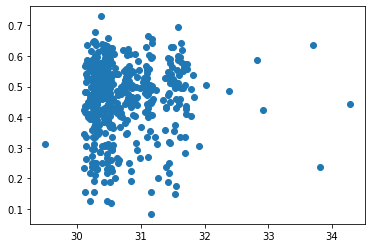

In [48]:
plt.scatter(dist_tot_vals, testdf['Accuracies'])

In [ ]:
plt.scatter(dist_tot_vals, testdf['Accuracies'])

# Dataset 9: age, P14 and P70 - easiest two to predict

In [57]:
age_P14_P70_path = workbookDir + '/data/age_P14_P70_traj_count_outputs/'
age_P14_P70_filelist = ['age_500_model_one_file_data.csv',
                    'age_500_model_two_file_data.csv',
                    'age_500_model_three_file_data.csv',
                    'age_500_model_four_file_data.csv',
                    'age_500_model_five_file_data.csv',
                    'age_500_model_six_file_data.csv',
                    'age_500_model_seven_file_data.csv',
                    'age_500_model_eight_file_data.csv',
                    'age_500_model_nine_file_data.csv',
                    'age_500_model_ten_file_data.csv',
                    'age_500_model_eleven_file_data.csv',
                    'age_500_model_twelve_file_data.csv',
                    'age_500_model_thirteen_file_data.csv',
                    'age_500_model_fourteen_file_data.csv',
                    'age_500_model_fifteen_file_data.csv']

In [58]:
age_P14_P70_dc = process_multimodel_data(age_P14_P70_filelist, age_P14_P70_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

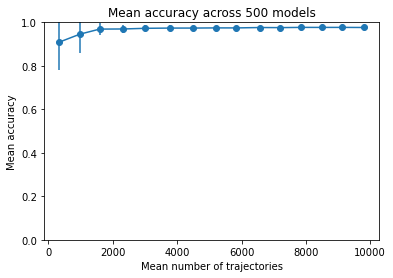

In [59]:
fig, ax = plt.subplots()
ax.errorbar(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['mean_acc'], yerr=age_P14_P70_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

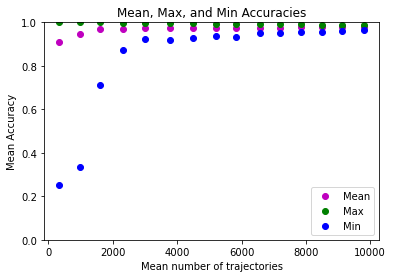

In [60]:
fig, ax = plt.subplots()
plt.scatter(x=age_P14_P70_dc['mean_traj_count'], y=age_P14_P70_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['max_acc'], c='g', label='Max')
plt.scatter(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
age_P14_P70_dc['max_acc']

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_P14_P70_dc['mean_acc'])):
    plt.scatter(age_P14_P70_dc['stdev_acc'][i], age_P14_P70_dc['mean_acc'][i], label=age_P14_P70_dc['mean_traj_count'][i])
plt.legend(loc='best', title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')